# Festival Sales Data Analysis using Python

In [1]:
# importing python libraries
import pandas as pd # data manipulation and analysis
import numpy as np # numerical computations
import matplotlib.pyplot as mp # visualizing data
import seaborn as sb # advanced statistical data visualizations 

In [2]:
df = pd.read_csv('Diwali_Sales_Data.csv', encoding='unicode_escape') # import csv data, avoid encoding error

## Data Pre-Processing and Cleaning

In [3]:
df.shape # to get rows, columns

(11251, 15)

In [4]:
df.head(10) # shows 10 records from the top

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [5]:
df.info() # returns info about fields of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# 2 fields named Status and unnamed1 have 0 non-null records, so drop/truncate those fields
df.drop(['Status', 'unnamed1'], axis=1, inplace=True) # axis=1 means drop columns, axis=0 means drop rows, inplace=True means modify the original df

In [7]:
pd.isnull(df).sum() # check for the sum of null values in each field. 12 null values found in Amount column.

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df.dropna(inplace=True) # drop null values from df

In [9]:
df.shape # 2 fields, null values are removed so no. of records reduced from 11251 to 11239 and no. of fields reduced from 15 to 13

(11239, 13)

In [10]:
df['Amount'] = df['Amount'].astype('int') # changing the data type of Amount field for data consistency

In [11]:
df.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int64
dtype: object

In [12]:
df[['Age','Orders','Amount']].describe() # to get the common numerical computation values for each field

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis

### Analyzing each required field for analysis -

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### 1. Gender

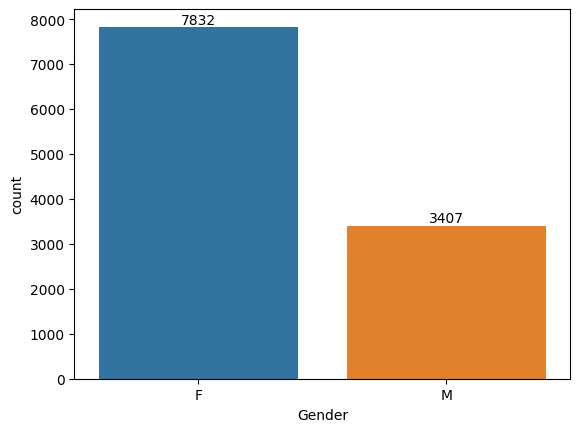

In [14]:
cp = sb.countplot(x = 'Gender', data=df, hue='Gender') # count plot based on gender, hue is used to group data by a categorical variable, visual distinction in the plot

for bars in cp.containers: # to get the count value of each bar(bar describes gender here)
    cp.bar_label(bars)

*The customers include mostly females(7832) around 70%*

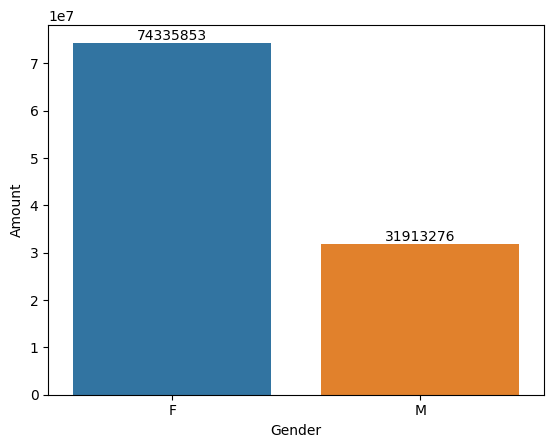

In [15]:
sales = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

bp = sb.barplot(x = 'Gender', y = 'Amount', data = sales, hue='Gender')
for bars in bp.containers:
    bp.bar_label(bars, fmt="%.0f")

*Females have spent more money (around 70% of total sales).*

### Inference : Customers include 70% females and female customers have a higher purchasing power than male customers.

### 2. Age

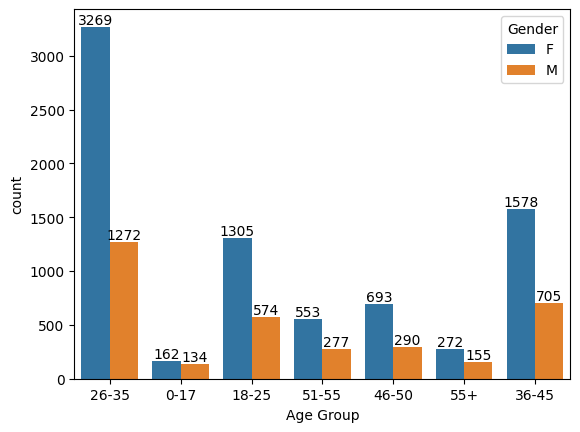

In [16]:
cp = sb.countplot(x='Age Group', data=df,hue='Gender')

for bars in cp.containers:
    cp.bar_label(bars)

*Most of the customers lies in the age group of 26-35. Also in every age group, no. of females is more.*

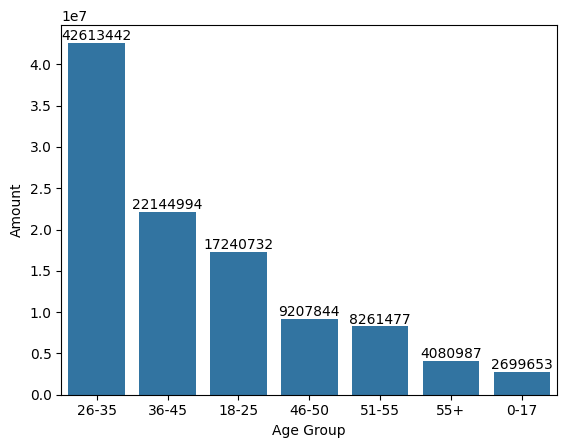

In [17]:
# Total expenditure vs Age Group

sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

bp = sb.barplot(x='Age Group', y='Amount', data=sales_age)
for bars in bp.containers:
    bp.bar_label(bars,fmt='%.0f')

*The customers in the age group of 26 to 35 have spent the most money*

### Inference : The customers lies mostly in the age group of 26-35 years and also they have spent the most. In these plots also, females are leading in every metric.

### 3. State

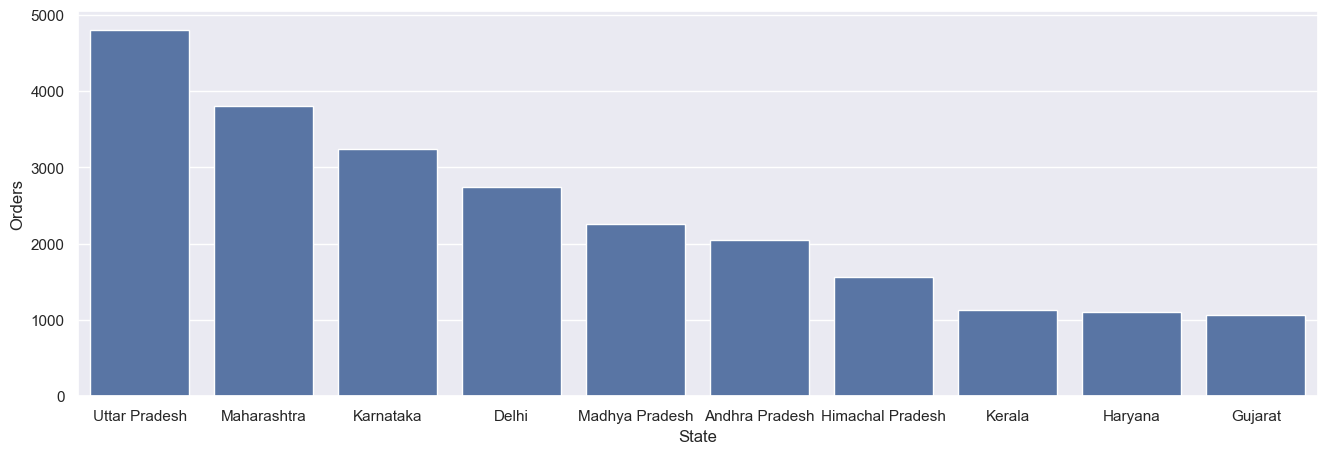

In [18]:
# Total no. of orders from top 10 states

state_orders = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sb.set(rc={'figure.figsize':(16,5)}) # rc is runtime_configuration, a dictionary in seaborn allows to set various params for plots like plot size here.
bp = sb.barplot(x='State',y='Orders',data=state_orders)

*Above states have highest orders*

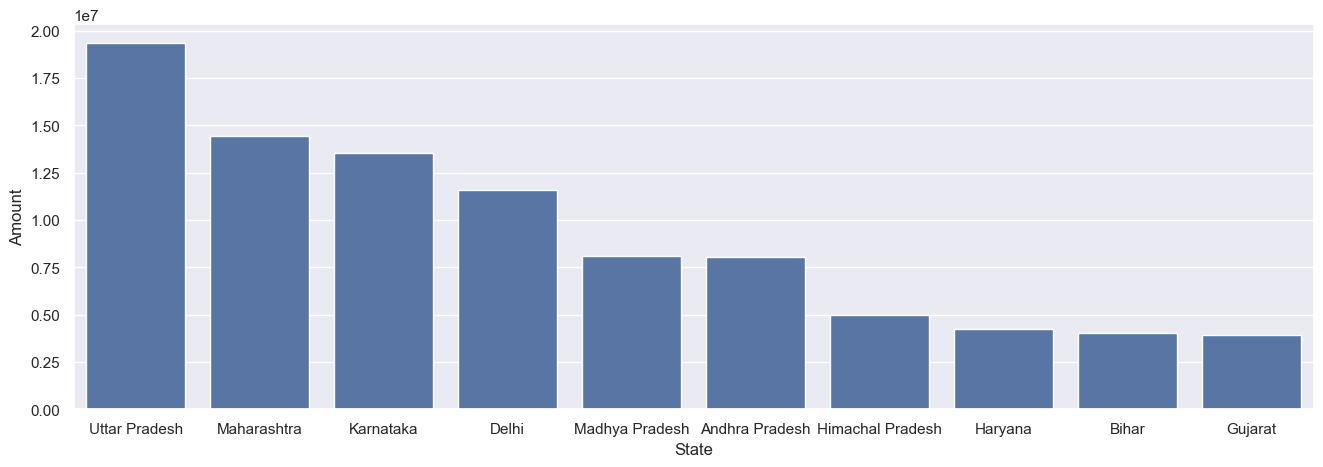

In [19]:
# Total sales from top 10 states

state_sales = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

bp = sb.barplot(x='State',y='Amount',data = state_sales)

*Above states have highest sales, their is a difference in some states like Kerala lies on 8th position in terms of no. of orders but it is not in the top 10 states in terms of the amount of purchase(sales) while Bihar lacks no. of orders but it emerges in sales*

### Inference : Most of the orders and sales are from Uttar Pradesh, Maharashtra and Karnataka respectively

### 4. Marital Status

[Text(0, 0, 'M'), Text(1, 0, 'U')]

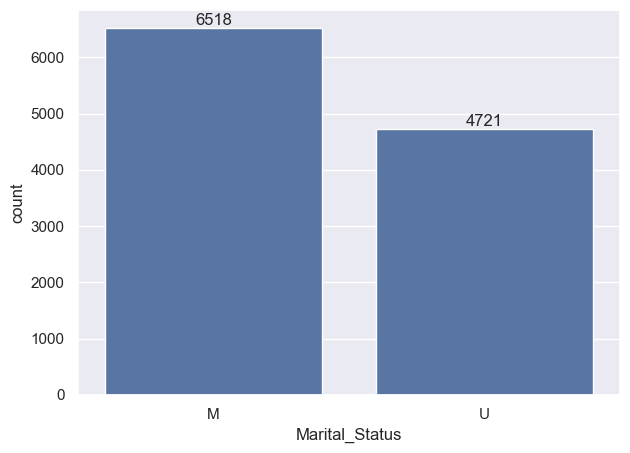

In [20]:
# Count of married and un-married customers

sb.set(rc={'figure.figsize':(7,5)})
cp = sb.countplot(x='Marital_Status',data = df)

for bars in cp.containers:
    cp.bar_label(bars)

cp.set_xticks([0,1])
cp.set_xticklabels(['M','U'])

[Text(0, 0, 'U'), Text(1, 0, 'M')]

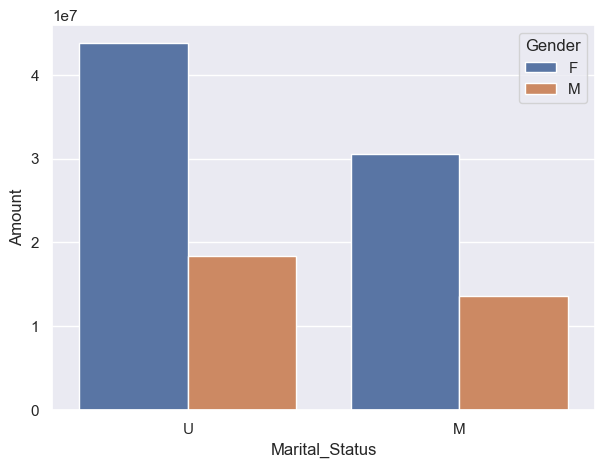

In [21]:
sales_by_marriage = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

bp = sb.barplot(x='Marital_Status',y='Amount',data=sales_by_marriage,hue='Gender')
bp.set_xticks([0, 1])
bp.set_xticklabels(['U', 'M'])

### Inference : Most of the customers are married females and they have higher purchasing power

### 5. Occupation

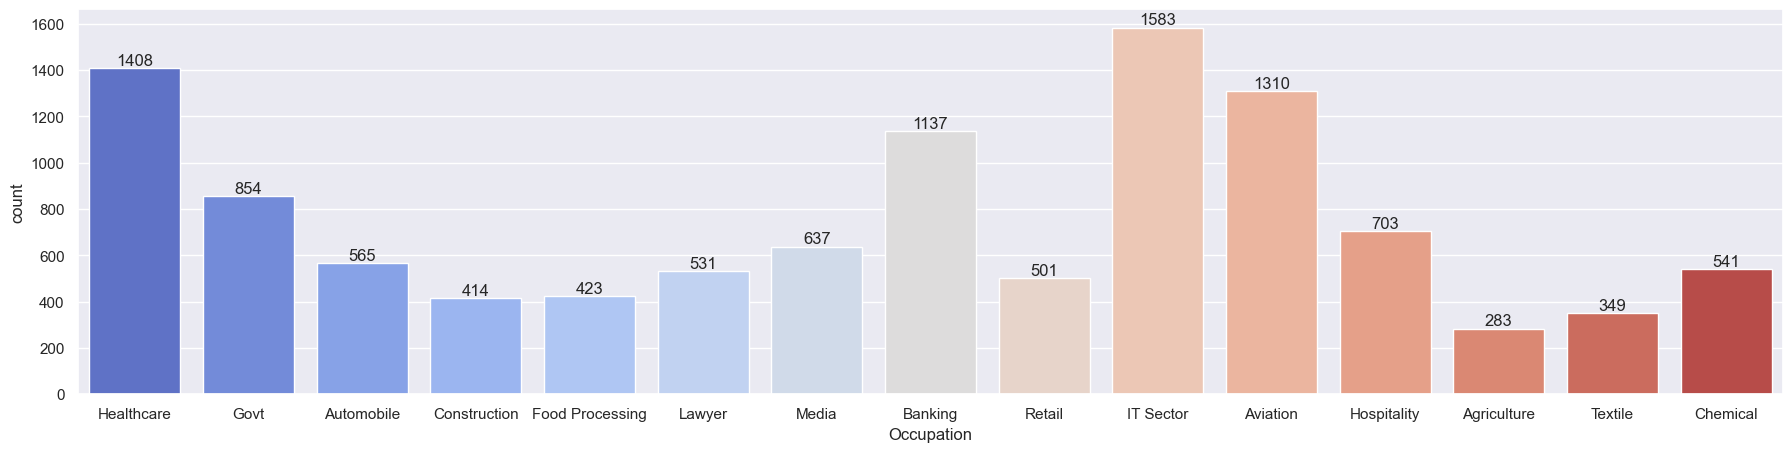

In [22]:
# Count of customers with respect to occupation
sb.set(rc={'figure.figsize':(22,5)})
cp = sb.countplot(x='Occupation',data=df, hue='Occupation',palette='coolwarm')

for bars in cp.containers:
    cp.bar_label(bars)

*Customers are mainly from IT Sector, Healthcare, Aviation, Banking occupation.*

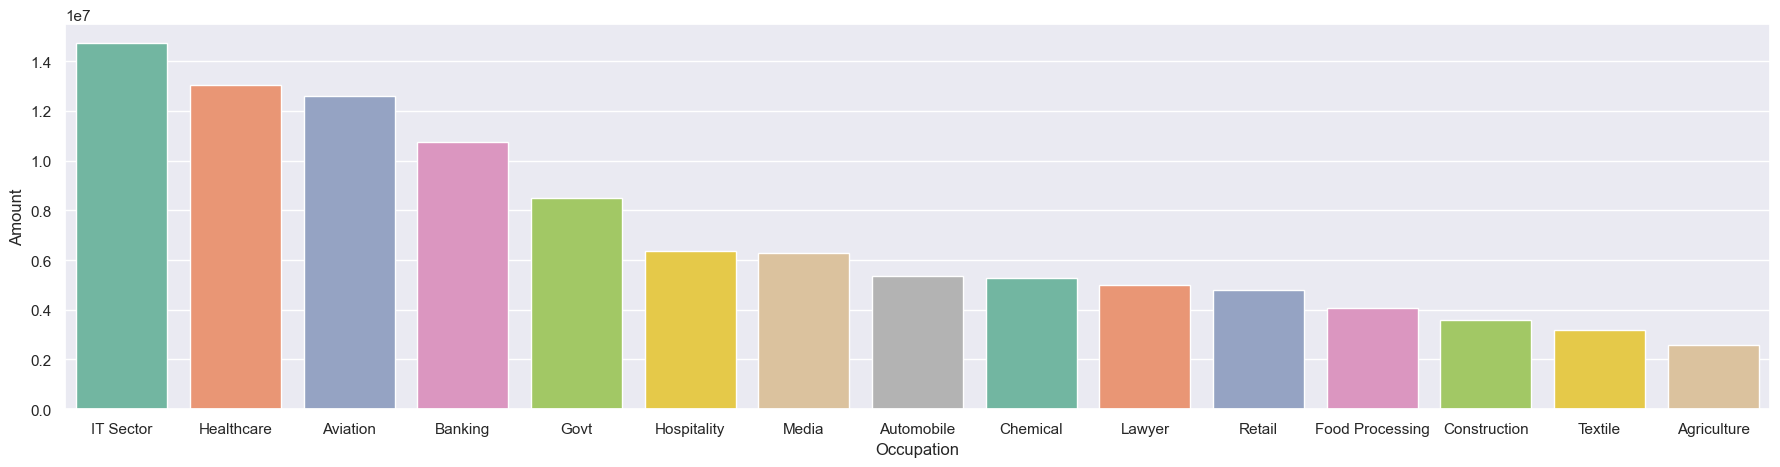

In [23]:
# Occupation vs Expenditure
sales_by_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
bp = sb.barplot(x='Occupation',y='Amount', data=sales_by_occupation, hue='Occupation', palette='Set2')

### Inference : Highest paying customers are from IT, Healthcare, Aviation and Banking sectors.

In [24]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### 6. Product Category

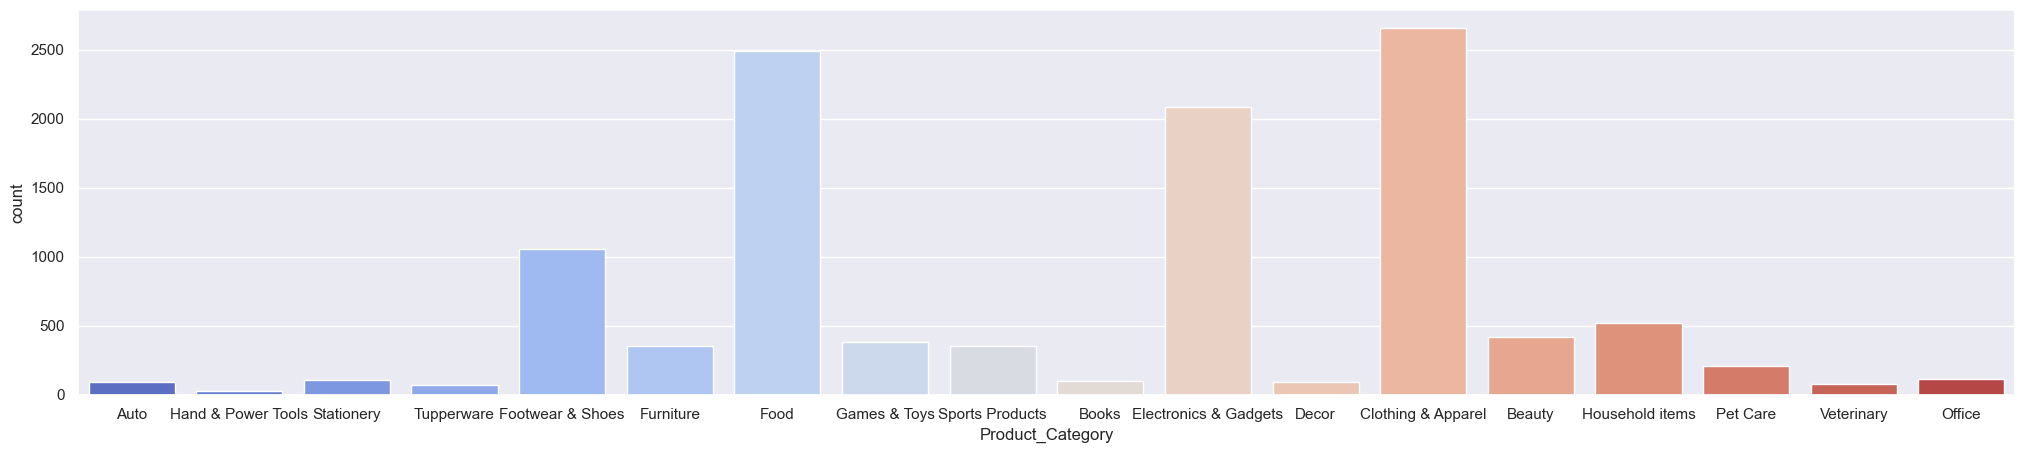

In [25]:
# Sales of each product_category
sb.set(rc={'figure.figsize':(25,5)})
cp = sb.countplot(x='Product_Category',data = df, hue='Product_Category', palette='coolwarm')

*Most ordered products are from Clothing, Food and Electronics respectively*

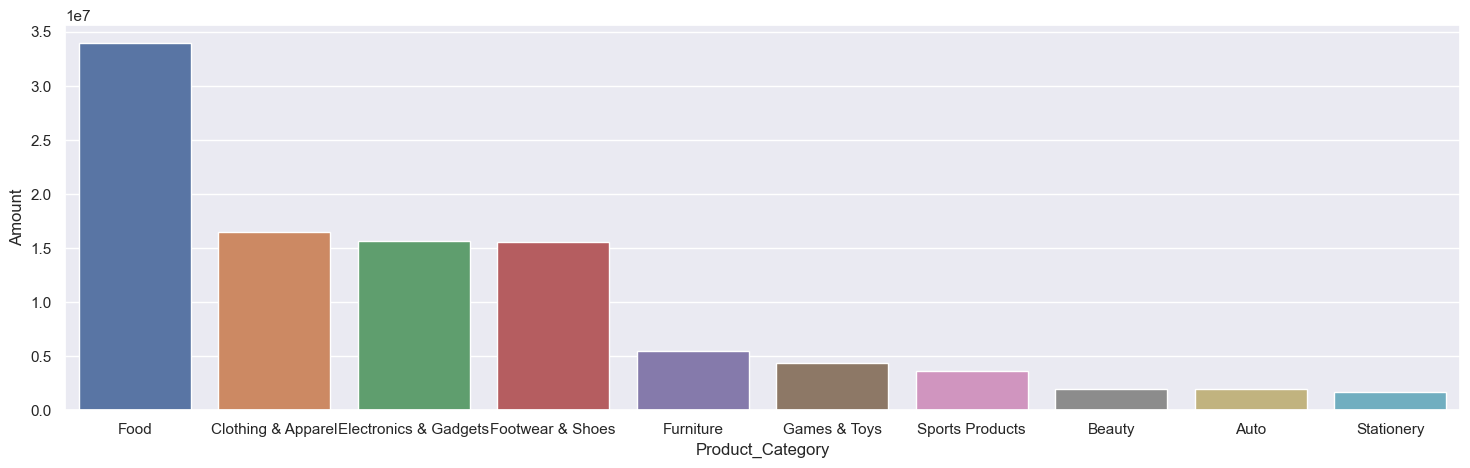

In [26]:
# Product_Category vs Sales

sales_by_product = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sb.set(rc={'figure.figsize':(18,5)})
bp = sb.barplot(x='Product_Category',y='Amount',data = sales_by_product, hue='Product_Category')

### Most ordered products are from the category Clothing, Food and Electronics respectively but the products of highest amount are sold from Food, Clothing and Electronics category respectively.

## Conclusion

### Married women of age group 26-35 years from Uttar Pradesh, Maharashtra and Karnataka working in IT, Healthcare, and Aviation are more likely to buy products from Food, Clothing and Electronics Category. 